In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hybra.fir_filterbank import AudletFIR
from hybra.utils import audfilters_fir, response, audtofreq, freqtoaud

In [ ]:
def audlet_HPF():
    # Compute fps and fpe (transition frequencies)
    fps = audtofreq(freqtoaud(fc_high[-2]) - 3 * spacing)
    fpe = audtofreq(freqtoaud(fc_high[-2]) - 4 * spacing)

    # Compute the scaling factor
    g_long = np.concatenate([g[:M2-1,:], np.zeros((M2-1, fs - filter_len))], axis=1)
    temp_resp = np.sum(np.abs(np.fft.rfft(g_long, axis=1))**2, axis=0) / np.sqrt(a)
    Hinv = np.sqrt(max(temp_resp)-temp_resp)

    PK = np.concatenate([np.zeros(fpe),
                         (1 - np.cos(np.pi * (np.linspace(fpe,fps)) / (fps - fpe))) / np.sqrt(8),
                         np.ones(fs//2 - fps) / np.sqrt(2)])
    
    # Compute the HPF
    HPF = np.fft.irfft(PK / Hinv)

    # # Compute fsupp_HP and ratio
    # fsupp_HPF = 2 * (fs // 2 - fpe)
    # ratio = 2 * (fps - fpe) / fsupp_HPF

    # # Lambda function for Lw
    # Lw = min(int(np.ceil(fsupp_HPF * filter_len / fs)), filter_len)

    # # Compute the HPF
    

/Users/Dane/opt/anaconda3/envs/hybra/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Dane/opt/anaconda3/envs/hybra/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


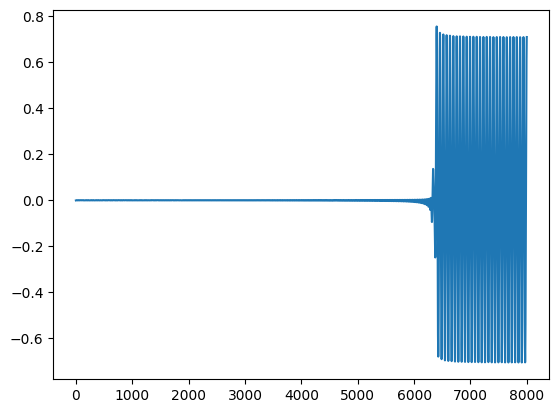

In [65]:
# plateu function for the HPF: 0 from 0 to fps, 1-cos from fps to fpe, and 1 from fpe to fs/2
fps = 6440
fpe = 6090

PK = np.concatenate([np.zeros(fpe), (1 - np.cos(
        np.pi * (np.linspace(fpe,fps)) / (fps - fpe)
    )) / np.sqrt(8),  np.ones(16000//2 - fps) / np.sqrt(2)])

#PK = np.concatenate([PK[::-1], PK])

# Compute the HPF
hpf = np.fft.irfft(PK)
hpf = np.roll(hpf,270)
hpf = hpf[:540]
# # smooth by multiplying a gauss of length 540
# hpf = hpf * np.exp(-np.linspace(-2,2,540)**2)
hpf = np.pad(hpf, (0, 16000-540))

HPF = np.fft.rfft(hpf)

# Plot the HPF
plt.plot(HPF)
# plt.xlim(0, 540)

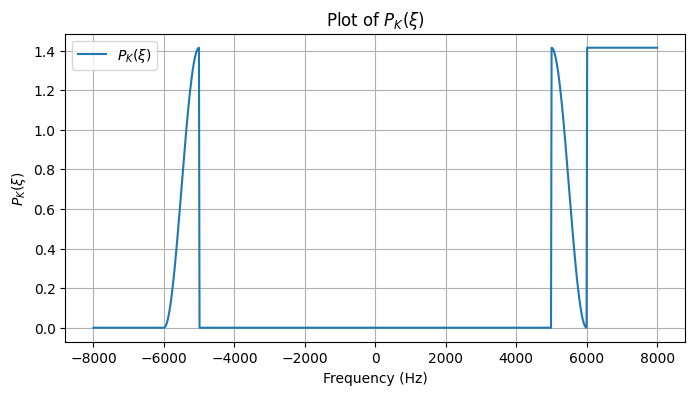

In [25]:
import numpy as np

def P_K(xi, fs, f_N, f_ps_plus, f_ps_minus, f_pe_plus):
    """
    Computes the value of P_K(ξ) based on the given mathematical formula.

    Parameters:
    xi : float or ndarray
        The normalized frequency variable ξ.
    fs : float
        Sampling frequency.
    f_N : float
        Nyquist frequency.
    f_ps_plus : float
        Upper transition frequency f_{p,s}^{+}.
    f_ps_minus : float
        Lower transition frequency (-f_{p,s}^{+}).
    f_pe_plus : float
        Cosine transition frequency f_{p,e}^{+}.

    Returns:
    float or ndarray
        The computed P_K(ξ) value.
    """
    abs_xi_fs = np.abs(xi) * fs

    # Case 1: ξfs ∈ (-f_N, -f_ps_plus) ∪ (f_ps_plus, f_N)
    mask_case1 = (xi*fs >= f_ps_plus) & (xi*fs <= f_N)
    P_K_values = np.where(mask_case1, 2 / np.sqrt(2), 0)

    # Case 2: ξfs ∈ [f_pe_plus, f_ps_plus]
    mask_case2 = (abs_xi_fs >= f_pe_plus) & (abs_xi_fs < f_ps_plus)
    P_K_values[mask_case2] = (1 / np.sqrt(2)) - np.cos(
        np.pi * (abs_xi_fs[mask_case2] - f_ps_plus) / (f_ps_plus - f_pe_plus)
    ) / np.sqrt(2)

    return P_K_values

# Example Usage:
fs = 16000  # Sampling frequency (example)
f_N = fs // 2  # Nyquist frequency
f_ps_plus = 6000  # Example transition frequency
f_ps_minus = -f_ps_plus
f_pe_plus = 5000  # Example cosine transition frequency

xi_values = np.linspace(-0.5, 0.5, 1000)  # Example normalized frequency range
P_K_values = P_K(xi_values, fs, f_N, f_ps_plus, f_ps_minus, f_pe_plus)

# Plot the function
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(xi_values * fs, P_K_values, label='$P_K(\\xi)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('$P_K(\\xi)$')
plt.title('Plot of $P_K(\\xi)$')
plt.legend()
plt.grid()
plt.show()


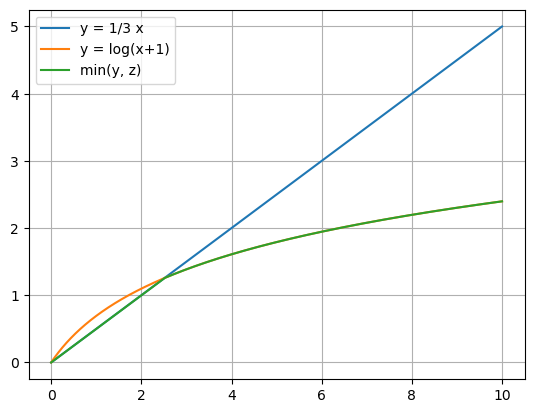

In [9]:
# plot a linear function with slope 1/2 and the log function
x = np.linspace(0, 10, 8000)
y = 1/2 * x
z = np.log(x+1)
# the minimum function of the two
min_f = np.minimum(y, z)

plt.plot(x, y, label='y = 1/3 x')
plt.plot(x, z, label='y = log(x+1)')
plt.plot(x, min_f, label='min(y, z)')
plt.legend()
plt.grid()
plt.show()

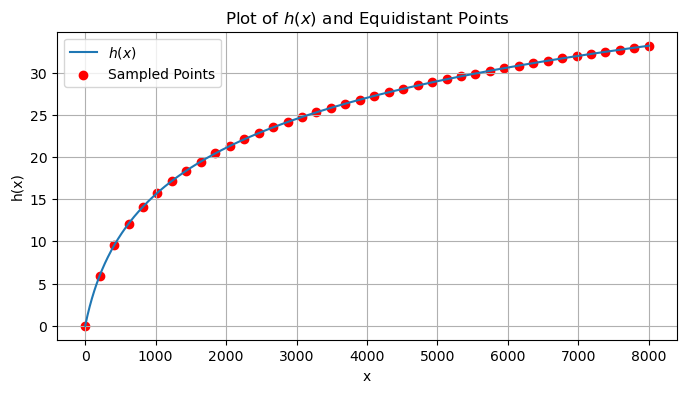

tensor([   0.0000,  205.6206,  410.4410,  615.2615,  820.8821, 1025.7025,
        1230.5231, 1436.1436, 1640.9641, 1845.7845, 2051.4050, 2256.2256,
        2461.8462, 2666.6667, 2871.4871, 3077.1077, 3281.9282, 3487.5488,
        3692.3691, 3897.1897, 4102.8105, 4307.6309, 4512.4512, 4718.0718,
        4922.8921, 5128.5127, 5333.3335, 5538.1538, 5743.7744, 5948.5947,
        6154.2153, 6359.0361, 6563.8564, 6769.4771, 6974.2974, 7179.1177,
        7384.7383, 7589.5591, 7795.1797, 8000.0000]) tensor([ 0.0000,  5.9394,  9.5178, 12.0927, 14.1124, 15.7638, 17.1649, 18.3861,
        19.4609, 20.4240, 21.2995, 22.0964, 22.8329, 23.5126, 24.1458, 24.7407,
        25.2976, 25.8249, 26.3219, 26.7936, 27.2442, 27.6722, 28.0814, 28.4747,
        28.8505, 29.2131, 29.5607, 29.8957, 30.2203, 30.5327, 30.8360, 31.1287,
        31.4123, 31.6886, 31.9558, 32.2156, 32.4692, 32.7152, 32.9557, 33.1892])


In [39]:
import torch

def h(x):
    """ h(x) = min(f(x), g(x)) """
    f = 1/20 * x
    g = 9.2645 * torch.log(1 + x * 0.00437)
    return torch.minimum(f, g)

def h_prime(x):
    """ Derivative of h(x) based on piecewise definition """
    f_prime = 0.5
    g_prime = 9.2645 * (0.00437 / (1 + 0.00437 * x))
    
    intersection_x = 1.678  # Precomputed intersection point
    deriv = torch.where(x <= intersection_x, g_prime, f_prime)
    return deriv

def arc_length_integral(x):
    """ Compute arc-length s(x) = ∫ sqrt(1 + (h'(t))²) dt """
    t = torch.linspace(0, x, 1000)  # High-resolution integration
    dt = t[1] - t[0]
    integrand = torch.sqrt(1 + h_prime(t) ** 2)
    return torch.trapz(integrand, dx=dt)  # Numerical integration

def compute_equidistant_points(M):
    """ Compute M equally spaced points along h(x) """
    x_vals = torch.linspace(0, 8000, 10000)  # High-resolution x values
    arc_lengths = torch.tensor([arc_length_integral(x) for x in x_vals])  # Compute arc lengths
    total_length = arc_lengths[-1]  # Total arc length

    target_lengths = torch.linspace(0, total_length, M)  # M equally spaced arc lengths
    sampled_x = torch.zeros(M)

    # Find x values corresponding to each target arc length
    for i, s_target in enumerate(target_lengths):
        idx = torch.argmin(torch.abs(arc_lengths - s_target))
        sampled_x[i] = x_vals[idx]

    return sampled_x, h(sampled_x)

import torch




# Example usage:
M = 40  # Number of points
x_samples, y_samples = compute_equidistant_points(M)
# Plot the function and sampled points
x = torch.linspace(0, 8000, 1000)
y = h(x)
y_f = 1/50 * x
y_g = 9.2645 * torch.log(1 + x * 0.00437)

plt.figure(figsize=(8, 4))
#plt.plot(x, y_f, label='$f(x) = 2x$')
#plt.plot(x, y_g, label='$g(x) = 9.2645 log(1 + 0.00437x)$')
plt.plot(x, y, label='$h(x)$')

plt.scatter(x_samples, y_samples, color='red', label='Sampled Points')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Plot of $h(x)$ and Equidistant Points')
plt.legend()
plt.grid()
plt.show()

print(x_samples, y_samples)

x-samples: tensor([   0.0000,  205.1282,  410.2564,  615.3846,  820.5128, 1025.6410,
        1230.7693, 1435.8975, 1641.0256, 1846.1538, 2051.2820, 2256.4102,
        2461.5386, 2666.6667, 2871.7949, 3076.9231, 3282.0513, 3487.1794,
        3692.3076, 3897.4358, 4102.5640, 4307.6924, 4512.8203, 4717.9487,
        4923.0771, 5128.2051, 5333.3335, 5538.4614, 5743.5898, 5948.7178,
        6153.8462, 6358.9746, 6564.1025, 6769.2310, 6974.3589, 7179.4873,
        7384.6152, 7589.7437, 7794.8716, 8000.0000])
y-samples: tensor([ 0.0000,  2.5641,  5.1282,  7.6923, 10.2564, 12.8205, 15.3846, 17.9487,
        19.4612, 20.4256, 21.2990, 22.0971, 22.8318, 23.5126, 24.1467, 24.7402,
        25.2979, 25.8240, 26.3218, 26.7942, 27.2437, 27.6724, 28.0821, 28.4744,
        28.8509, 29.2126, 29.5607, 29.8962, 30.2200, 30.5329, 30.8355, 31.1286,
        31.4126, 31.6883, 31.9559, 32.2161, 32.4691, 32.7154, 32.9553, 33.1892])


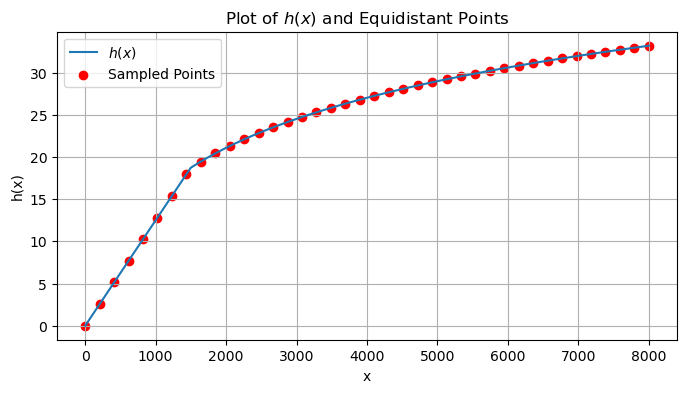

tensor([   0.0000,  205.1282,  410.2564,  615.3846,  820.5128, 1025.6410,
        1230.7693, 1435.8975, 1641.0256, 1846.1538, 2051.2820, 2256.4102,
        2461.5386, 2666.6667, 2871.7949, 3076.9231, 3282.0513, 3487.1794,
        3692.3076, 3897.4358, 4102.5640, 4307.6924, 4512.8203, 4717.9487,
        4923.0771, 5128.2051, 5333.3335, 5538.4614, 5743.5898, 5948.7178,
        6153.8462, 6358.9746, 6564.1025, 6769.2310, 6974.3589, 7179.4873,
        7384.6152, 7589.7437, 7794.8716, 8000.0000]) tensor([ 0.0000,  2.5641,  5.1282,  7.6923, 10.2564, 12.8205, 15.3846, 17.9487,
        19.4612, 20.4256, 21.2990, 22.0971, 22.8318, 23.5126, 24.1467, 24.7402,
        25.2979, 25.8240, 26.3218, 26.7942, 27.2437, 27.6724, 28.0821, 28.4744,
        28.8509, 29.2126, 29.5607, 29.8962, 30.2200, 30.5329, 30.8355, 31.1286,
        31.4126, 31.6883, 31.9559, 32.2161, 32.4691, 32.7154, 32.9553, 33.1892])


In [46]:
import torch

def f(x):
    return 1/80 * x

def g(x):
    return 9.2645 * torch.sign(x) * torch.log(1 + torch.abs(x) * 0.00437)

def h(x):
    return torch.minimum(f(x), g(x))

# Sample in an equidistant manner in x
M = 40
x_samples = torch.linspace(0, 8000, M)  # Equally spaced in x
y_samples = h(x_samples)

print("x-samples:", x_samples)
print("y-samples:", y_samples)


plt.figure(figsize=(8, 4))
#plt.plot(x, y_f, label='$f(x) = 2x$')
#plt.plot(x, y_g, label='$g(x) = 9.2645 log(1 + 0.00437x)$')
plt.plot(x, h(x), label='$h(x)$')

plt.scatter(x_samples, y_samples, color='red', label='Sampled Points')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Plot of $h(x)$ and Equidistant Points')
plt.legend()
plt.grid()
plt.show()

print(x_samples, y_samples)

In [ ]:
def audfilters_fir(filter_length, fs, Ls, spacing=1, bwmul=1, scale='erb'):
    """
    Generate FIR filter kernel with length *filter_length* equidistantly spaced on auditory frequency scales.
    
    Parameters:
        filter_length (int): Length of the FIR filter.
        num_channels (int): Number of channels.
        fs (int): Sampling rate.
        Ls (int): Signal length.
        bwmul (float): Bandwidth multiplier.
        scale (str): Auditory scale.
    
    Returns:
        filters (list of torch.Tensor): Generated filters.
        a (list): Downsampling rates.
        fc (list): Center frequencies.
        L (int): Admissible signal length.
    """
    
    fmax = fs // 2

    ####################################################################################################
    # Center frequencies
    ####################################################################################################

    # min and max center frequencies (agnostic to the LPF)
    fmin = max(fmin, audtofreq(spacing))
    fmax = min(fmax, fs // 2)

    # Number of channels
    M0 = int(np.floor((freqtoaud(fmax) - freqtoaud(fmin)) / spacing))

    # Adjust fmax to match spacing
    fmax = audtofreq(freqtoaud(fmin) + M0 * spacing)

    # Ensure fmax < fs/2 and adjust the number of channels
    count = 0
    while fmax >= fs // 2:
        count += 1
        fmax = audtofreq(freqtoaud(fmin) + (M0 - count) * spacing)
    M0 -= count

    # Center frequencies as equidistantly spaced points between fmin and fmax
    fc = audspace(fmin, fmax, M0)
    fc = np.append(fc, fs // 2)  # Add fs//2 as the frequency for the HPF
    M2 = M0 + 1

    ####################################################################################################
    # Bandwith conversion factor
    ####################################################################################################

    probeLs = 10000
    probeLg = 1000

    # probe prototype window full length
    g_probe = firwin(probeLg,probeLs)
    
    # peak normalize
    gf_probe = np.fft.fft(g_probe) / np.max(np.abs(np.fft.fft(g_probe)))

    # compute ERB-type bandwidth of the prototype
    winbw = np.linalg.norm(gf_probe)**2 * probeLg / probeLs / 4

    ####################################################################################################
    # Frequency support
    ####################################################################################################

    # Frequency support measured in Hz
    fsupp = np.zeros(M2)
    fsupp[:M2-1] = audfiltbw(fc[:M2-1]) / winbw * bwmul

    # Optimal stride
    a = np.floor(np.min(fs / fsupp[:M2-1])).astype(int)

    # next admissible signal length
    L = int(np.ceil(Ls / a) * a)

    ####################################################################################################
    # Time support
    ####################################################################################################

    # Calculate time supports -- Whats that factor 10.64??
    tsupp = (np.round(winbw / fsupp[:-1] * fs * 10.64)).astype(int)

    # Find all channels that need to be shortened
    ind_crit = np.where(tsupp[:-1] >= filter_length)[0]

    if ind_crit.size > 0:
        # Center frequency for the last valid channel
        fc_crit = fc[ind_crit[-1] + 1]

        # Frequency step from the previous to the last valid fc
        LP_step = fc[ind_crit[-1] + 2] - fc_crit

        # Number of bands needed
        LP_num = int(np.floor(fc_crit / LP_step))
        res = fc_crit - LP_num * LP_step

        # Center frequencies of the low-pass filters
        fc_high = fc[ind_crit[-1] + 1:]
        fc_high[:-1] = fc_high[:-1] - res
        fc_low = np.flip(fc_high[0] - np.arange(1, LP_num + 1) * LP_step)
        fc_new = np.concatenate((fc_low, fc_high))

        tsuppmax = tsupp[ind_crit[-1] + 1]
        tsupp_low = np.ones(LP_num) * tsuppmax
        tsupp_high = tsupp[ind_crit[-1] + 1:]
        tsupp = np.concatenate((tsupp_low, tsupp_high)).astype(int)
    else:
        fc_new = fc
        fc_low = None
        fc_high = None

    M2 = len(fc_new)

    ####################################################################################################
    # Generate filters
    ####################################################################################################

    g = np.zeros((M2, filter_length), dtype=np.complex128)

    g[0,:] = np.sqrt(a) * np.roll(firwin(tsupp[0], filter_length), (filter_length - tsupp[0]) // 2) / np.sqrt(2)
    g[-1,:] = np.sqrt(a) * modulate(np.roll(firwin(tsupp[-1], filter_length), (filter_length - tsupp[-1]) // 2), fs // 2, fs) / np.sqrt(2)

    for m in range(1,M2-1):
        g[m,:] = np.sqrt(a) * modulate(np.roll(firwin(tsupp[m], filter_length), (filter_length - tsupp[m]) // 2), fc_new[m], fs)

    return g, a, M2, fc_new, L, fc, fc_low, fc_high, ind_crit